In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#upload csv file and read
from google.colab import files
uploaded = files.upload()


Saving Loan_Modelling.csv to Loan_Modelling (1).csv


In [7]:
#read file
file = pd.read_csv('Loan_Modelling.csv')

In [8]:
file

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
#examine the file
file.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
#check for duplicates
file.duplicated().sum()

0

There are no duplicates

In [11]:
#check for file information
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
#perform simple statistics
file.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
#check for null values
file.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
file.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
#define a function that iterates through the column and prints out the unique values
def print_value_counts(file):
    for column in file.columns:
        print(column)
        print(file[column].value_counts())
        print(f'-------------------------------------------------------------')  # Add (----) for separation

# 
print_value_counts(file)

ID
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
-------------------------------------------------------------
Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64
-------------------------------------------------------------
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7    

In [16]:
#define a function that iterates through the columns checking for empty strings 
def check_for_empty_string(file):
  for column in file.columns:
    if (' ' in file[column].values):
     print('Empty strings present')
  else:
    print('Empty strings absent')

check_for_empty_string(file)

Empty strings absent


<ipython-input-16-b958de4037f3>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (' ' in file[column].values):


In [17]:
#check for the correlation
file.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


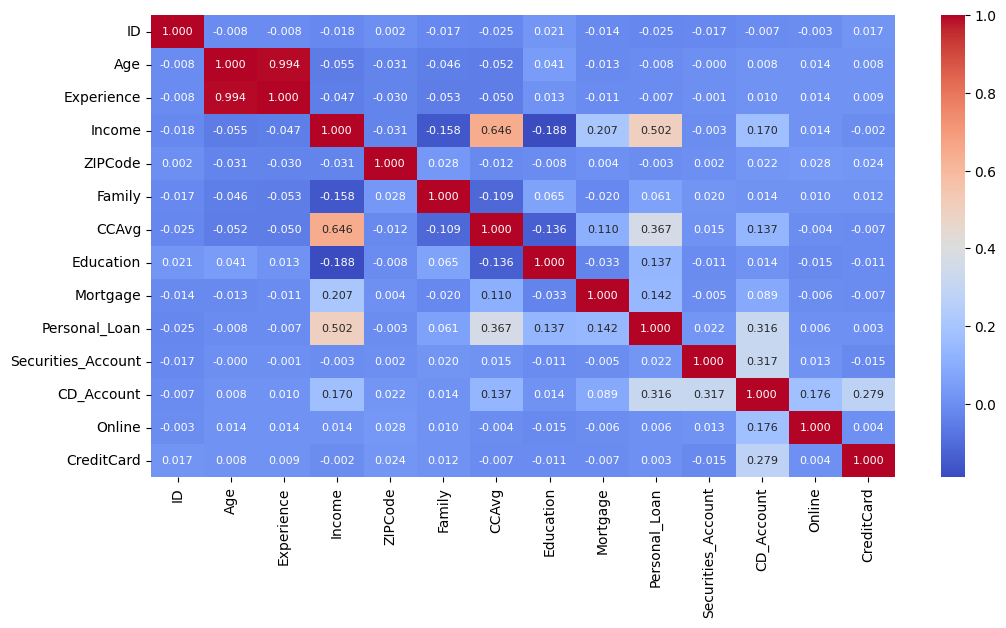

In [18]:
#heatmap plot
corr_mat = file.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(data = corr_mat, cmap= 'coolwarm', annot = True, fmt = '.3f', annot_kws= {'size':8})
plt.show()

Income, CCAvg, CD_Account, are highly correlated in descending order.

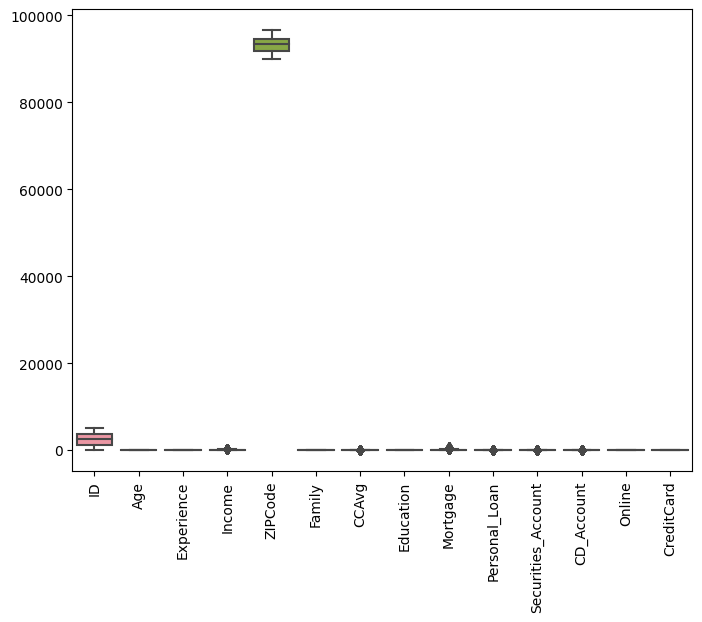

In [19]:
#boxplot showing the summary statistics of the dataset
plt.figure(figsize =(8,6))
plt.xticks(rotation = 90)
sns.boxplot(data = file)
plt.show()

Univariate Analysis

Family


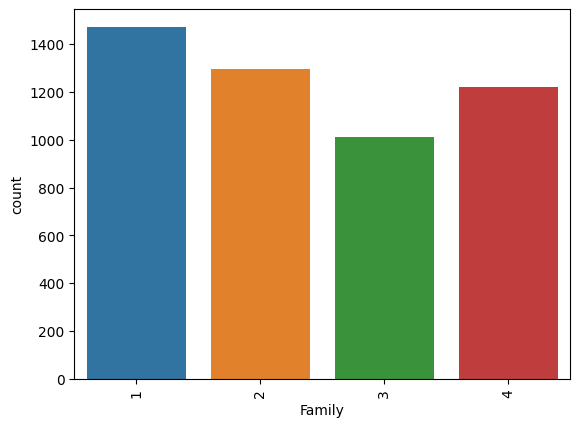

Education


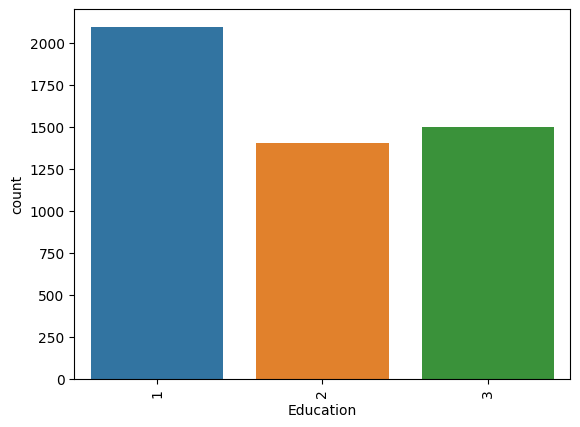

Personal_Loan


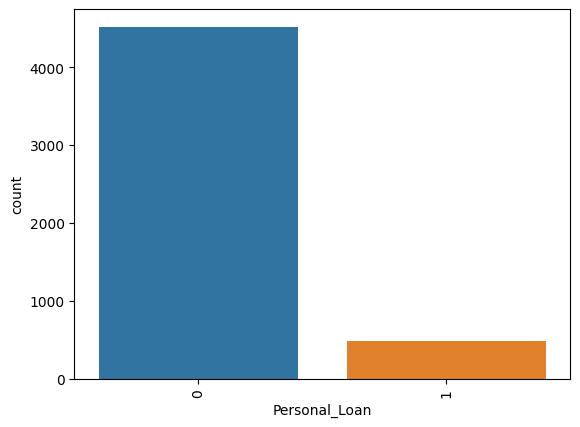

Securities_Account


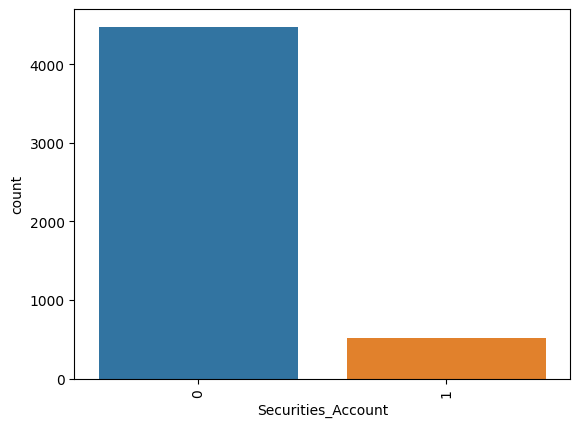

CD_Account


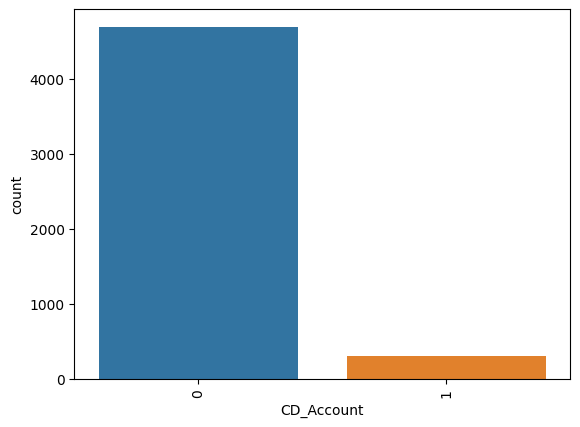

Online


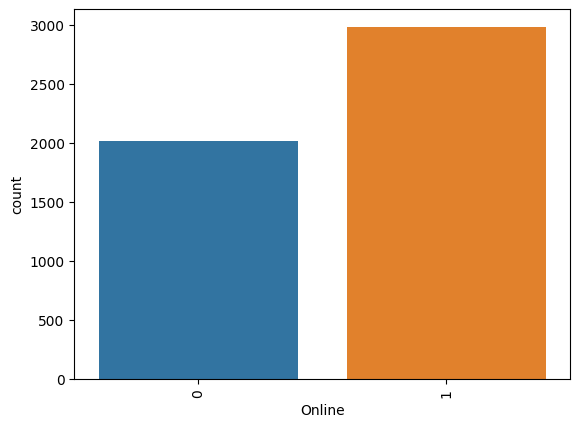

CreditCard


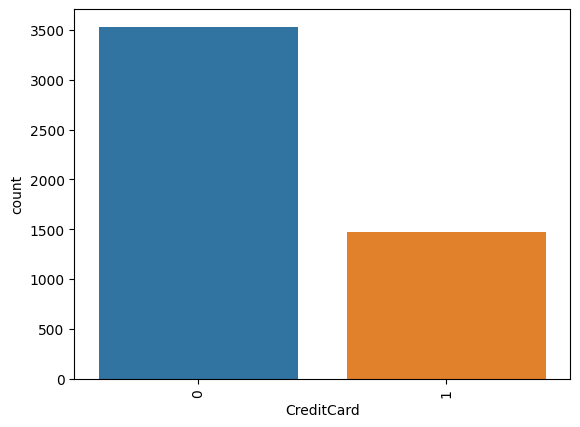

In [20]:
# function showing the univariate analysis of the features
columns = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

def univariate_analysis():
    for column in columns:
        print(column)
        sns.countplot(data=file, x=column)
        plt.xticks(rotation=90)
        plt.show()

univariate_analysis()

Income


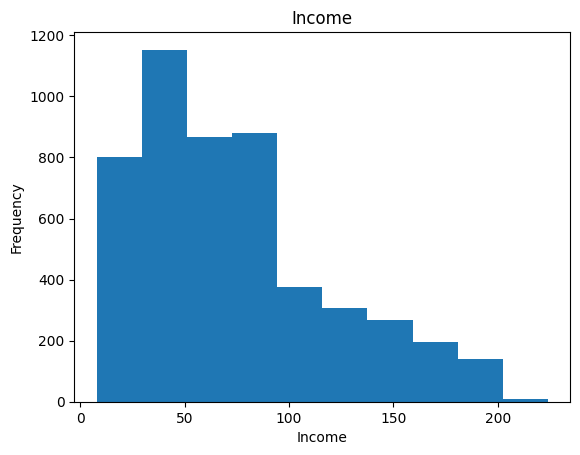

Experience


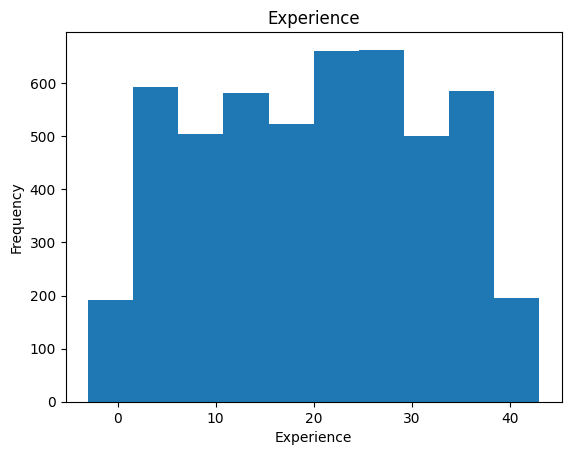

Age


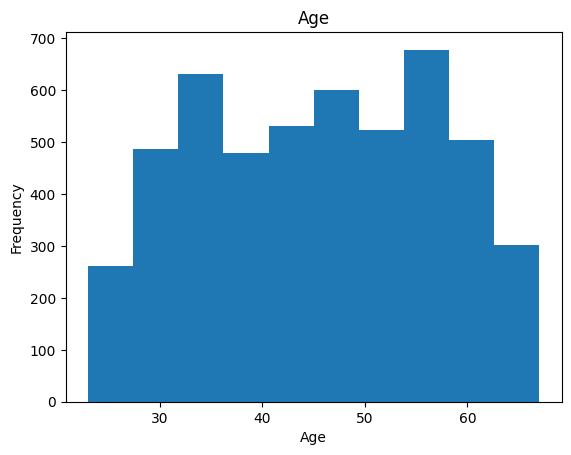

Mortgage


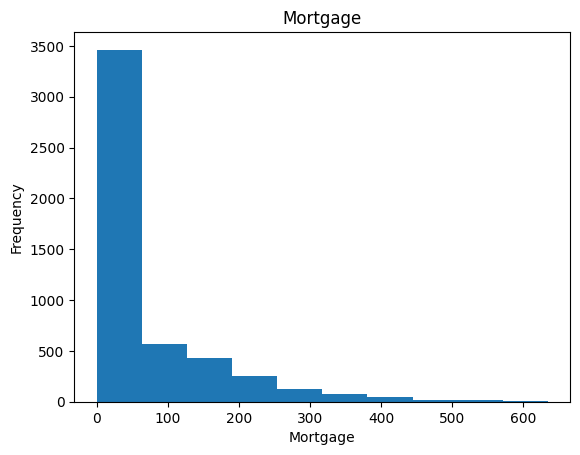

In [21]:
#function showing the univariate analysis
columns = ['Income', 'Experience', 'Age', 'Mortgage']
def univariate_analysis_():
    for column in columns:
        print(column)
        plt.hist(data=file, x=column, bins =10)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
univariate_analysis_()


The mortgage and income are rightskewed, while experience and age are normally distributed.

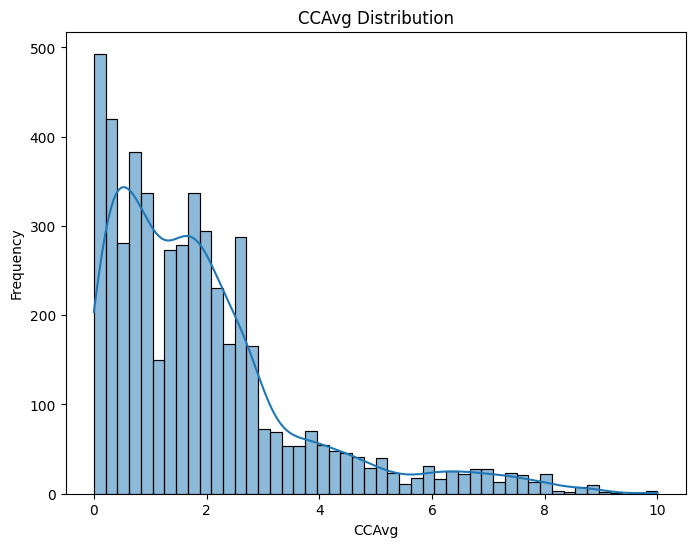

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=file, x="CCAvg", kde=True)
plt.title('CCAvg Distribution')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
plt.show()


the CCAvg Disbtribution is right skewed

Bivariate Analysis

In [23]:
def bivariate_analysis(column, variable1):
    plt.figure()
    sns.countplot(data=file, x=column, hue=variable1)
    plt.title(f'Comparison of {column} and {variable1}')
    plt.show()

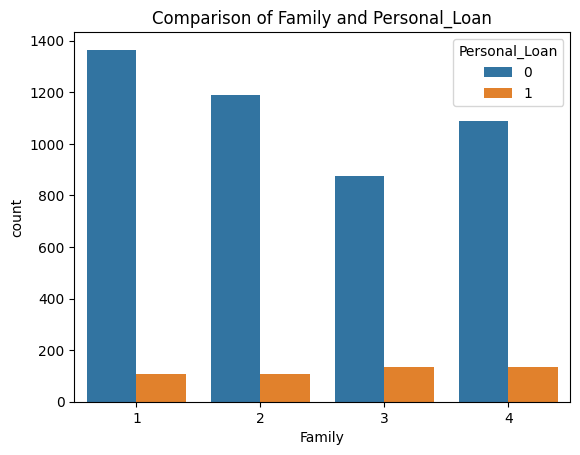

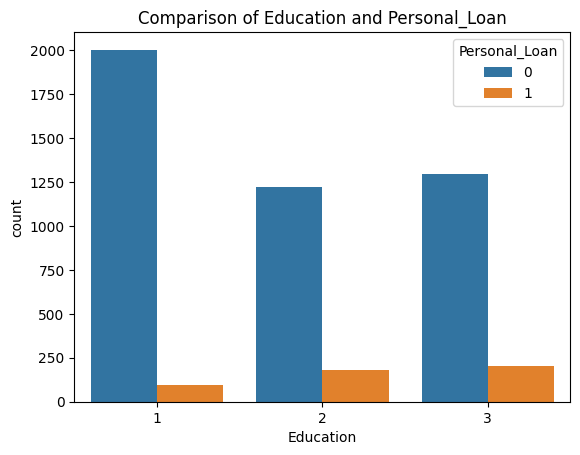

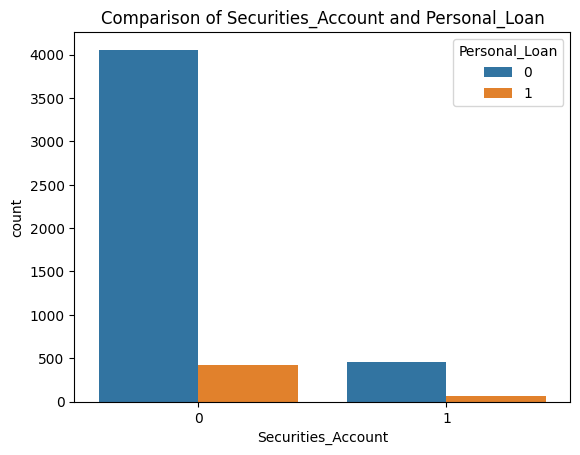

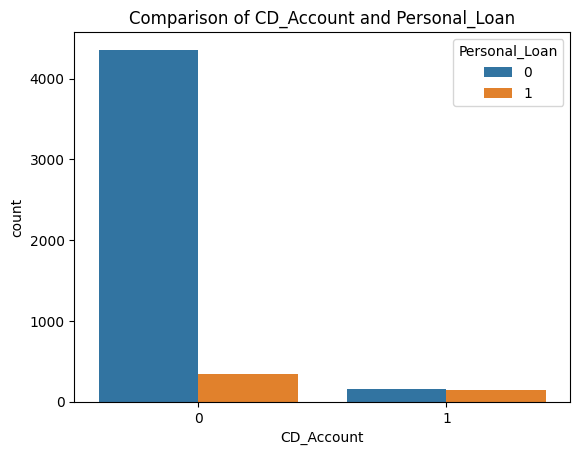

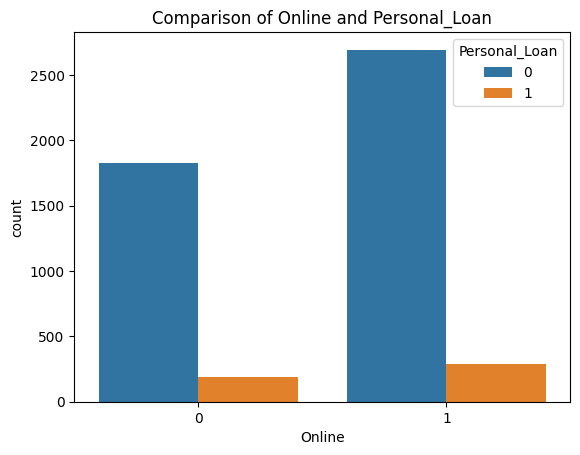

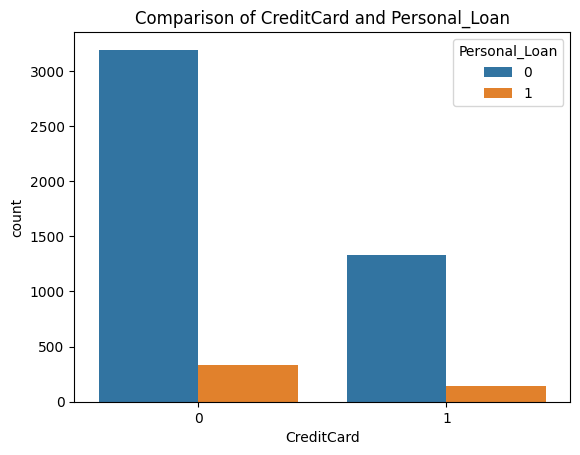

In [24]:
bivariate_analysis('Family', 'Personal_Loan')
bivariate_analysis('Education', 'Personal_Loan')
bivariate_analysis('Securities_Account', 'Personal_Loan')
bivariate_analysis('CD_Account', 'Personal_Loan')
bivariate_analysis('Online', 'Personal_Loan')
bivariate_analysis('CreditCard', 'Personal_Loan')

fro those without CD Account, about 4300 took Personal loan while about 300 did not take while there was no much difference for those with CD Account(around 300 people).For those without internet banking about 1700 people took personal loan while about 200 did not take while for those with internet banking about 2700 took personal loan while about 200 did not take. For those without credit card, about 3200 took personal loan while about 200 did not take, while for those with credit card about 1250 took personl loan while about 150 did not take.

In [25]:

def bivariate_analysis2(column, variable1):
    plt.figure()
    sns.histplot(data=file, x=column, hue=variable1, bins=10, multiple='stack')
    plt.title(f'Comparison of {column} and {variable1}')
    plt.show()

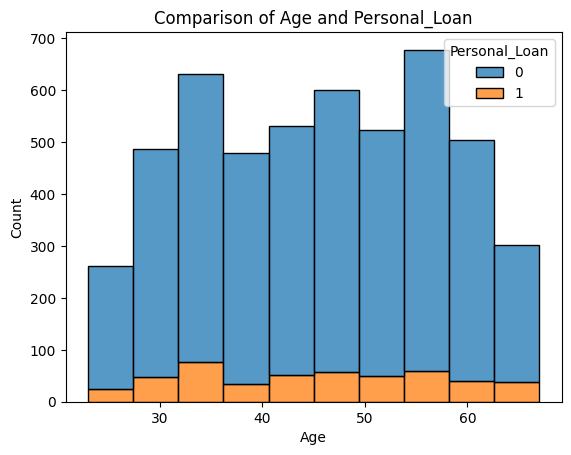

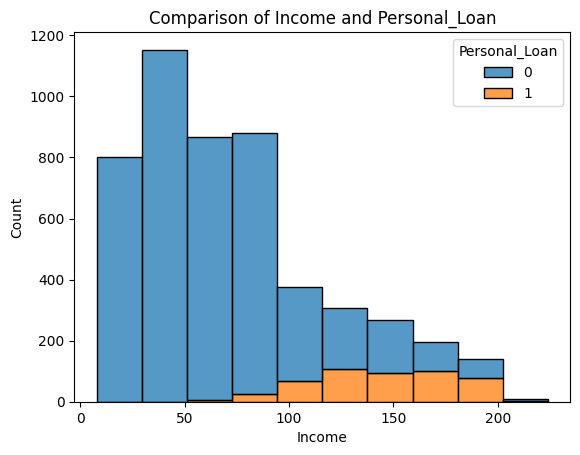

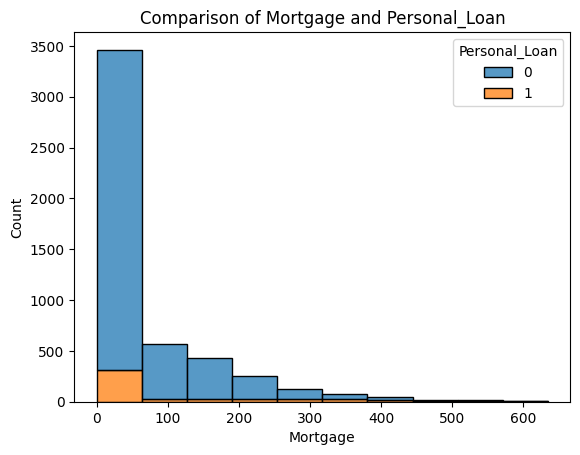

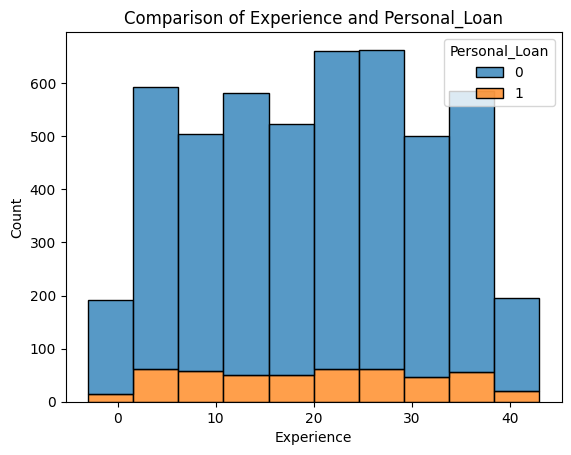

In [26]:
bivariate_analysis2('Age', 'Personal_Loan')
bivariate_analysis2('Income', 'Personal_Loan')
bivariate_analysis2('Mortgage', 'Personal_Loan')
bivariate_analysis2('Experience', 'Personal_Loan')


we can see the acceptance of personal loan decreasing among people with very little professional experience and those with very high professional experience of above 40 years, this couuld be because of their reaching their retirement age and so may not be able to service the loan. for house mortgage we can see the collection of personal loan decreasing as house mortgage increases. this could be as a result of them refusing to collect other loans since they are servicing the mortgage already. the collection of peronal loan increases a s income increases because this set of people can comfortable service this interest loans because of their high income. fro Age, those in their 30s took more personal loan than those in their 60s. this could be because of the impact of retirement at that age.

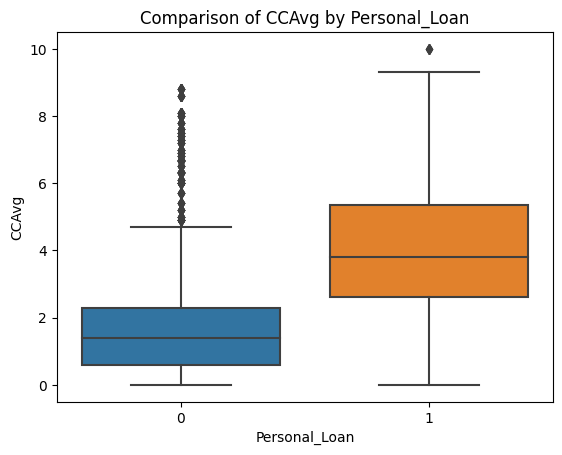

In [27]:
plt.figure()
sns.boxplot(data=file, x= 'Personal_Loan', y='CCAvg')
plt.title(f'Comparison of CCAvg by Personal_Loan')
plt.show()

those with high spending on credit card took personal loan than those with less spending on credit card. this could be attributed to lifestyle, that is those who have less spending don't have the habit of incuring debts and so avoided the personal loan

In [28]:
#create a copy
df = file.copy()

In [29]:
#treat outliers
def treat_outliers(df, col):
    """
    treat outliers
    col = parameter in the functon that represents the columns
    df_clean = dataframe
    
    """
    Q1 = df[col].quantile(0.25) #25th quantile
    Q3 = df[col].quantile(0.75) #upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df


def treat_all_outliers(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [30]:
#teated the outliers of only the features that have outliers
out_list = ['Income', 'Experience', 'CCAvg', 'ZIPCode', 'Mortgage']

#call the function
df = treat_all_outliers(df, out_list)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

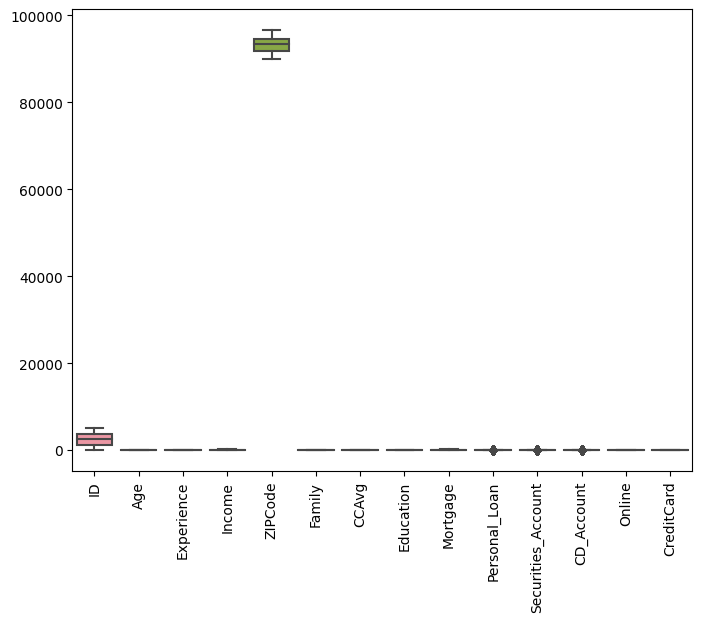

In [31]:
#sanity check
plt.figure(figsize = (8,6))
plt.xticks(rotation = 90)
sns.boxplot(df)
plt

In [32]:
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0.0,0,0,0,1,0
4996,4997,30,4,15.0,92037,4,0.4,1,85.0,0,0,0,1,0
4997,4998,63,39,24.0,93023,2,0.3,3,0.0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0.0,0,0,0,1,0


Logistic Regression

In [33]:
#Drop Customer ID, it is not needed in model building
df.drop(['ID'], axis = 1, inplace = True)

In [34]:
# Logistic Regression
#value_count
df['Personal_Loan'].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

0 class represents does that did not buy the Personl loan while class 1 represents those that bought the personal loan

In [35]:
#data preprocessing 

from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

In [36]:
#split into tain and test set and statify because of the imbalance data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [37]:
#check split data
y_train.value_counts(normalize= True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [38]:
# Scale the data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

Scaling brings all features to a similar range

In [39]:
#import Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg=  LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})
log_reg.fit(X_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [40]:
# method is used to evaluate the accuracy of a logistic regression model.
log_reg.score(X_train_sd, y_train)

0.8935

In [41]:
log_reg.predict(X_test_sd)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [42]:
log_reg.predict_proba(X_test_sd)[:, 1]

array([0.61273756, 0.03253685, 0.05360471, 0.32804717, 0.25465582,
       0.10691688, 0.04771377, 0.05721062, 0.81682091, 0.07458145,
       0.03501622, 0.11749877, 0.00227282, 0.68609138, 0.01346155,
       0.00770091, 0.01009569, 0.40830491, 0.23824422, 0.03310221,
       0.30630636, 0.02758287, 0.05622758, 0.10043272, 0.15707306,
       0.74168389, 0.00726638, 0.05404446, 0.07907838, 0.21064854,
       0.71538557, 0.11523906, 0.03289272, 0.0337651 , 0.0823401 ,
       0.27090985, 0.00909433, 0.03317362, 0.22167615, 0.06237955,
       0.0269813 , 0.16742567, 0.01701154, 0.05229195, 0.07009239,
       0.02011809, 0.02162513, 0.02197907, 0.00550713, 0.12626644,
       0.70864984, 0.01280466, 0.00563732, 0.17029894, 0.0297496 ,
       0.07187766, 0.02412907, 0.02419247, 0.45848537, 0.97931342,
       0.62463634, 0.08075473, 0.14848315, 0.78873718, 0.03036909,
       0.08629936, 0.02995782, 0.04452224, 0.05042289, 0.03924195,
       0.02038806, 0.98700742, 0.01672486, 0.58533879, 0.51633

In [43]:
# import model performance evaluators libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

Saving utils.py to utils.py


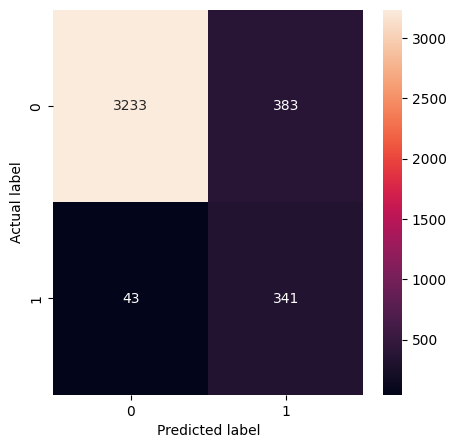

,Accuracy,Recall,Precision,F1-score
0,0.8935,0.888021,0.470994,0.615523


In [44]:
from google.colab import files
uploaded = files.upload()

#import utils, a pre-built model
from utils import model_performance_classification
log_reg_train = model_performance_classification(log_reg, X_train_sd, y_train)
log_reg_train

the  model correctly predicted that out of 3616 liability customers, 3233 will not buy personal loan. out of 348 asset customers the model predicted that 341 bought personal loan.

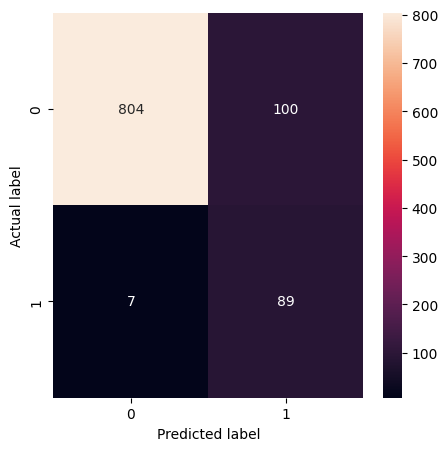

,Accuracy,Recall,Precision,F1-score
0,0.893,0.927083,0.470899,0.624561


In [45]:
log_reg_test = model_performance_classification(log_reg, X_test_sd, y_test)
log_reg_test

the model is generalising well

Cross validation

In [46]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
#from sklearn.
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # here you scale the entire dataset, this ensures that the scaling is consistent across all the folds.

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000) #Increase the number of iterations (max_iter), you provide the solver with more opportunities to find the optimal weights and achieve convergence.

# Perform cross-validation with scaled data
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5)

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.954 0.951 0.958 0.95  0.954]
Mean accuracy: 0.9533999999999999


Interpreting these results, it can be concluded that the model demonstrates strong performance and generalizability. The consistently high cross-validation scores and the relatively high mean accuracy suggest that the model is able to effectively learn patterns and make accurate predictions on unseen data. This indicates that the model is robust and performs consistently well across different data subsets, providing confidence in its overall accuracy and reliability.

Decision Tree

In [47]:
#import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# import warnings 
from warnings import simplefilter
#ignore all future warnings
simplefilter(action ='ignore', category = FutureWarning)

In [49]:
X.shape

(5000, 12)

In [50]:
y.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

0 class represents those that did not accept the loan during the campign while
1 class  represents those that accepted the loan during the campign

Decision Tree

In [51]:
dec_tree = DecisionTreeClassifier(random_state = 0)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

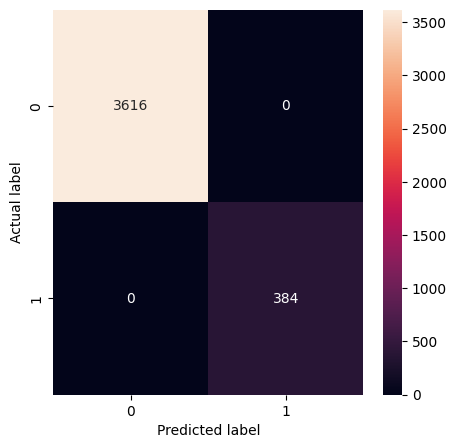

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [52]:
dec_tree_train = model_performance_classification(dec_tree, X_train, y_train)
dec_tree_train

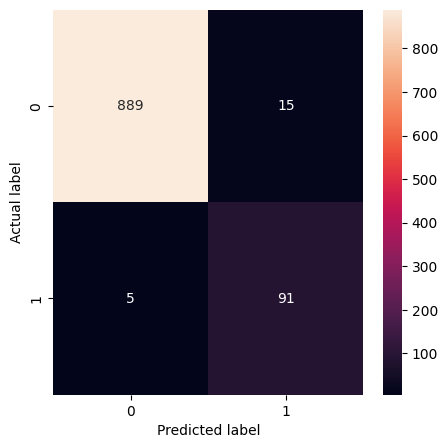

,Accuracy,Recall,Precision,F1-score
0,0.98,0.947917,0.858491,0.90099


In [53]:
dec_tree_test = model_performance_classification(dec_tree, X_test, y_test)
dec_tree_test

Hyper parmeter tuning of the decision tree. Pruning technique used is the Pre-pruning technique.

In [54]:
dec2_tree = DecisionTreeClassifier(random_state = 0, max_depth = 4)
dec2_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

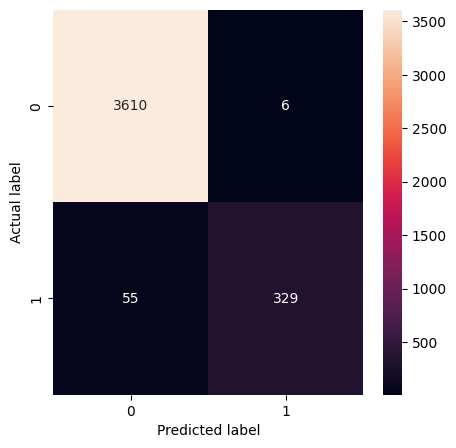

,Accuracy,Recall,Precision,F1-score
0,0.98475,0.856771,0.98209,0.91516


In [55]:
dec2_tree_train = model_performance_classification(dec2_tree, X_train, y_train)
dec2_tree_train

the model is generalizing well

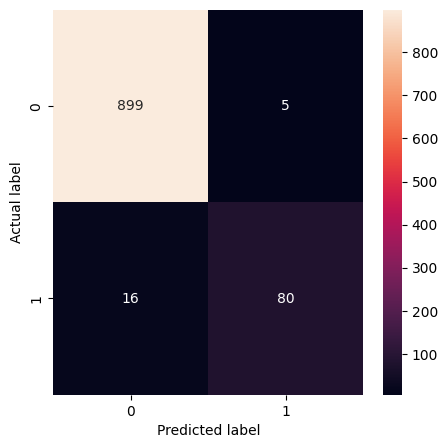

,Accuracy,Recall,Precision,F1-score
0,0.979,0.833333,0.941176,0.883978


In [56]:
dec2_tree_test = model_performance_classification(dec2_tree, X_test, y_test)
dec2_tree_test

Image of Decision Tree Model

In [57]:
from sklearn.tree import plot_tree

In [58]:
!pip install pydotplus
import pydotplus
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


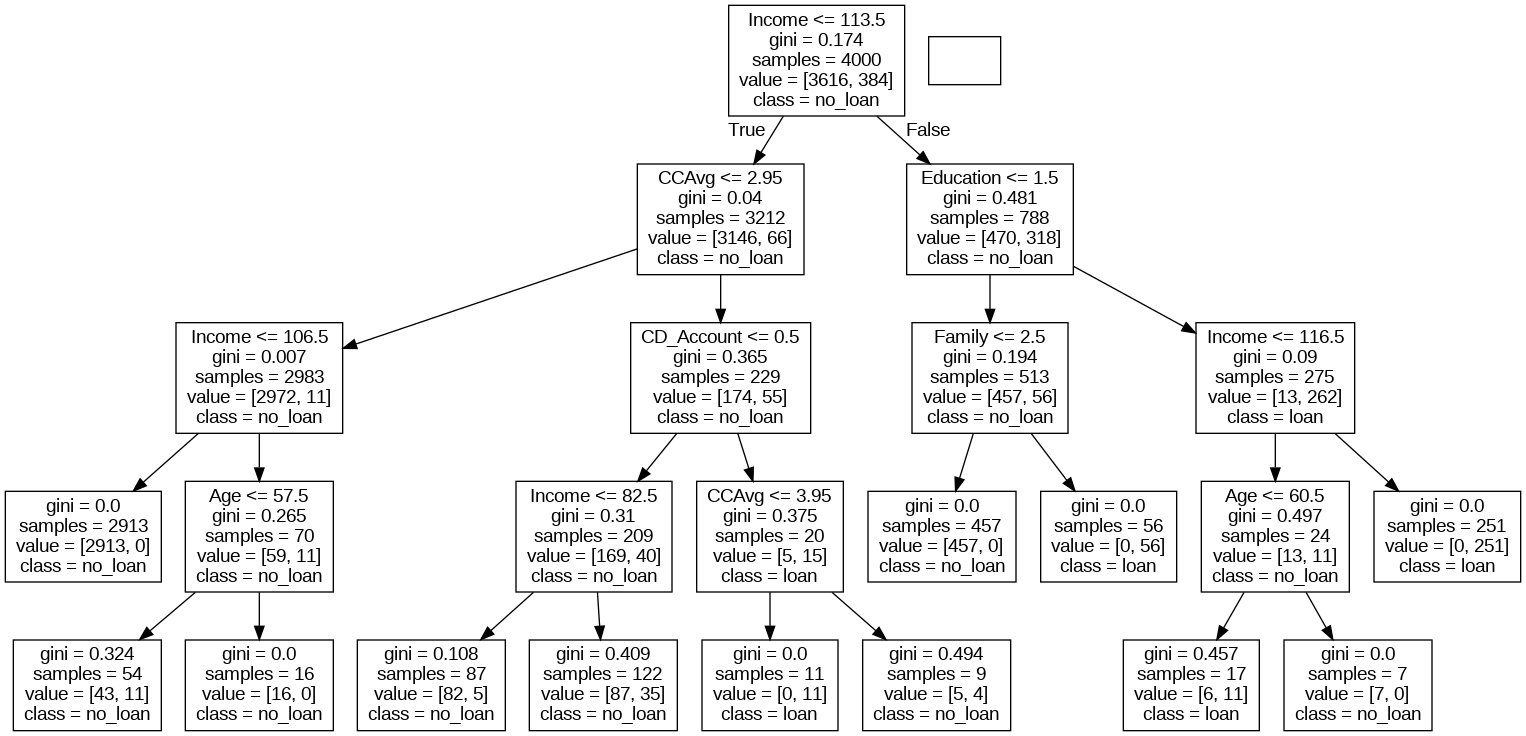

In [59]:
dot_data = tree.export_graphviz(dec2_tree, out_file = None, feature_names=X.columns, class_names=['no_loan', 'loan'])

#create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

#create the tree image from the graph
Image(graph.create_png())

 Feature Importances

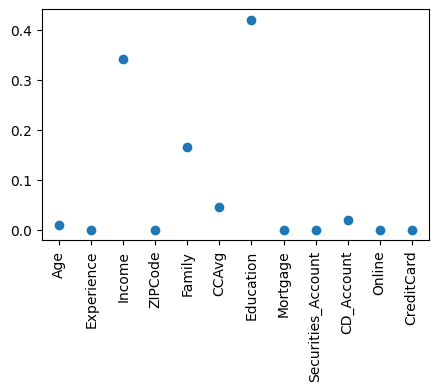

In [60]:
plt.figure(figsize = (5,3))
plt.plot(dec2_tree.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Education, Income, Family, CCAvg are the features contributing to this model, arranged in descending order.

Random Forest

In [61]:
#import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#instantiate the classifier
rf = RandomForestClassifier(random_state=0)

#train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

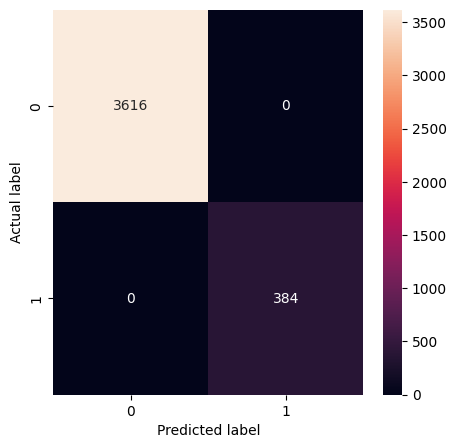

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [62]:
rf_train = model_performance_classification(rf, X_train, y_train)
rf_train

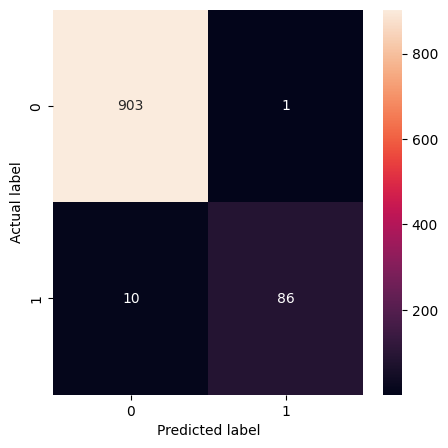

,Accuracy,Recall,Precision,F1-score
0,0.989,0.895833,0.988506,0.939891


In [63]:
rf_test = model_performance_classification(rf, X_test, y_test)
rf_test

hyper parameter tuning

In [64]:
#instantiate the classifier
rf2 = RandomForestClassifier(random_state=0, max_depth=6)

#train the model
rf2.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, random_state=0)

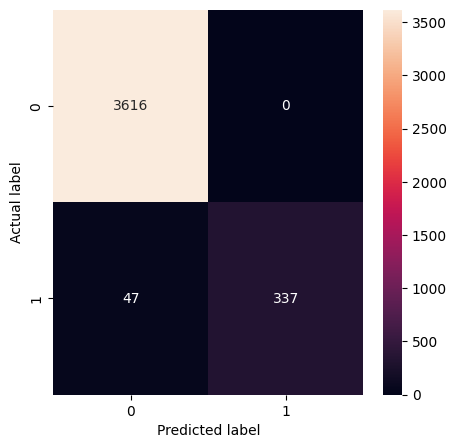

,Accuracy,Recall,Precision,F1-score
0,0.98825,0.877604,1.0,0.934813


In [65]:
rf2_train = model_performance_classification(rf2, X_train, y_train)
rf2_train

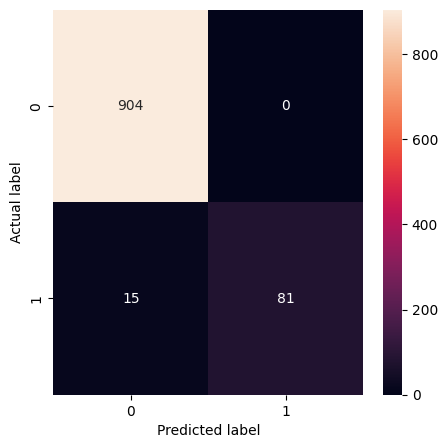

,Accuracy,Recall,Precision,F1-score
0,0.98825,0.877604,1.0,0.934813


In [66]:
rf2_test = model_performance_classification(rf2, X_test, y_test)
rf2_train

Feature importances

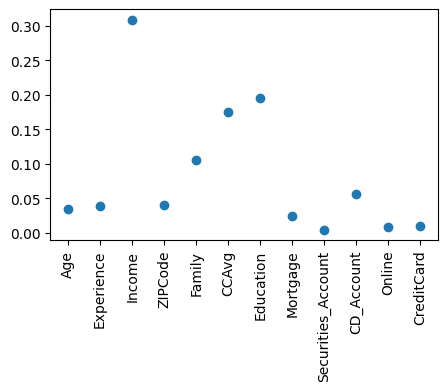

In [67]:
plt.figure(figsize = (5,3))
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Income, Education, CCAvg, Family, CD_Account, ZIPCode are the features contributing to this model, arranged in descending order.

Gradient Boosting

In [68]:
#instantiate the classifier
gb = GradientBoostingClassifier(random_state=0)

#train the model
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

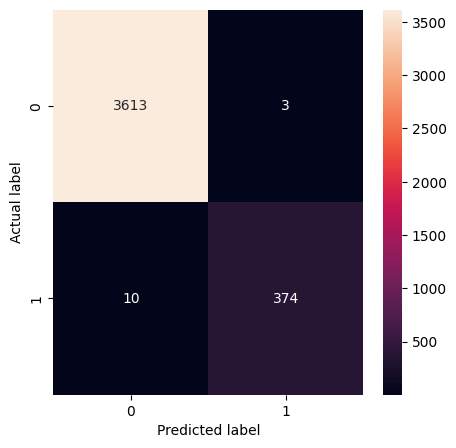

,Accuracy,Recall,Precision,F1-score
0,0.99675,0.973958,0.992042,0.982917


In [69]:
gb_train = model_performance_classification(gb, X_train, y_train)
gb_train

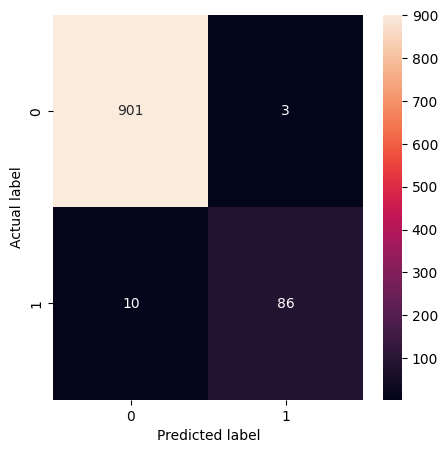

,Accuracy,Recall,Precision,F1-score
0,0.987,0.895833,0.966292,0.92973


In [70]:
gb_test = model_performance_classification(gb, X_test, y_test)
gb_test

the model is generalising well

Feature Importance

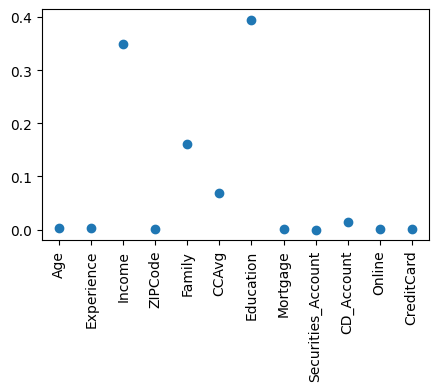

In [71]:
plt.figure(figsize = (5,3))
plt.plot(gb.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Education, Income, Family, CCAvg are the features contributing to this model, arranged in descending order.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 70, 100],  # Number of trees in the forest
    'max_depth': [None, 4, 6],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model performance on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.92      0.94        96

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



the campaign should focus on Those with high credit card spending, young age especially the 20s and 30s, high income from 50,000 dollars and those with less mortgage because they are likely going to buy the personal loan

Decision tree model performed better than logistic regression because of the assumptions of a logistic regression